In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [3]:
music_df = pd.read_csv('./tracks/tracks2.csv')
music_df.head()

,Track ID,Track Name,Popularity,Duration (ms),Explicit,Artists,id_artists,Release Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],22-02-1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],01-06-1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
music_df.shape

(586672, 20)

In [5]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Track ID          586672 non-null  object 
 1   Track Name        586601 non-null  object 
 2   Popularity        586672 non-null  int64  
 3   Duration (ms)     586672 non-null  int64  
 4   Explicit          586672 non-null  int64  
 5   Artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   Release Date      586672 non-null  object 
 8   Danceability      586672 non-null  float64
 9   Energy            586672 non-null  float64
 10  Key               586672 non-null  int64  
 11  Loudness          586672 non-null  float64
 12  Mode              586672 non-null  int64  
 13  Speechiness       586672 non-null  float64
 14  Acousticness      586672 non-null  float64
 15  Instrumentalness  586672 non-null  float64
 16  Liveness          58

In [6]:
music_df.isnull().sum()

Track ID             0
Track Name          71
Popularity           0
Duration (ms)        0
Explicit             0
Artists              0
id_artists           0
Release Date         0
Danceability         0
Energy               0
Key                  0
Loudness             0
Mode                 0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
time_signature       0
dtype: int64

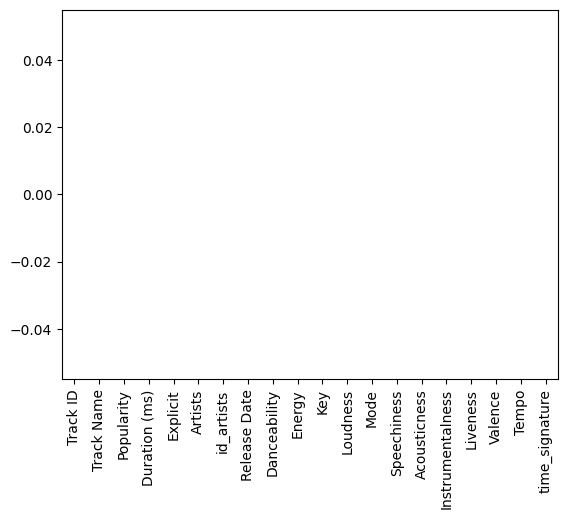

In [7]:
music_df.dropna(inplace = True)
music_df.isnull().sum().plot.bar()
plt.show()

In [8]:
print(music_df['Track Name'])

0                                       Carve
1         Capítulo 2.16 - Banquero Anarquista
2          Vivo para Quererte - Remasterizado
3               El Prisionero - Remasterizado
4                         Lady of the Evening
                         ...                 
586667                                    云与海
586668                                  blind
586669              What They'll Say About Us
586670                        A Day At A Time
586671                       Mar de Emociones
Name: Track Name, Length: 586601, dtype: object


In [9]:
music_df.drop_duplicates(subset=['Track Name'], keep='first', inplace=True)

In [10]:
music_df.shape

(446444, 20)

In [11]:
data = music_df

In [12]:
scaler = MinMaxScaler()
music_features = music_df[['Popularity','Explicit','Danceability', 'Energy', 'Key',
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values
music_features_scaled = scaler.fit_transform(music_features)

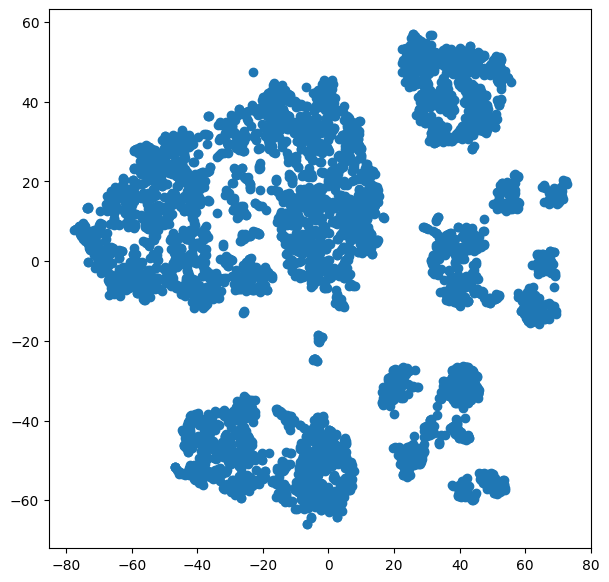

In [13]:
model = TSNE(n_components = 2)
tsne_data = model.fit_transform(music_features_scaled[:5000])
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

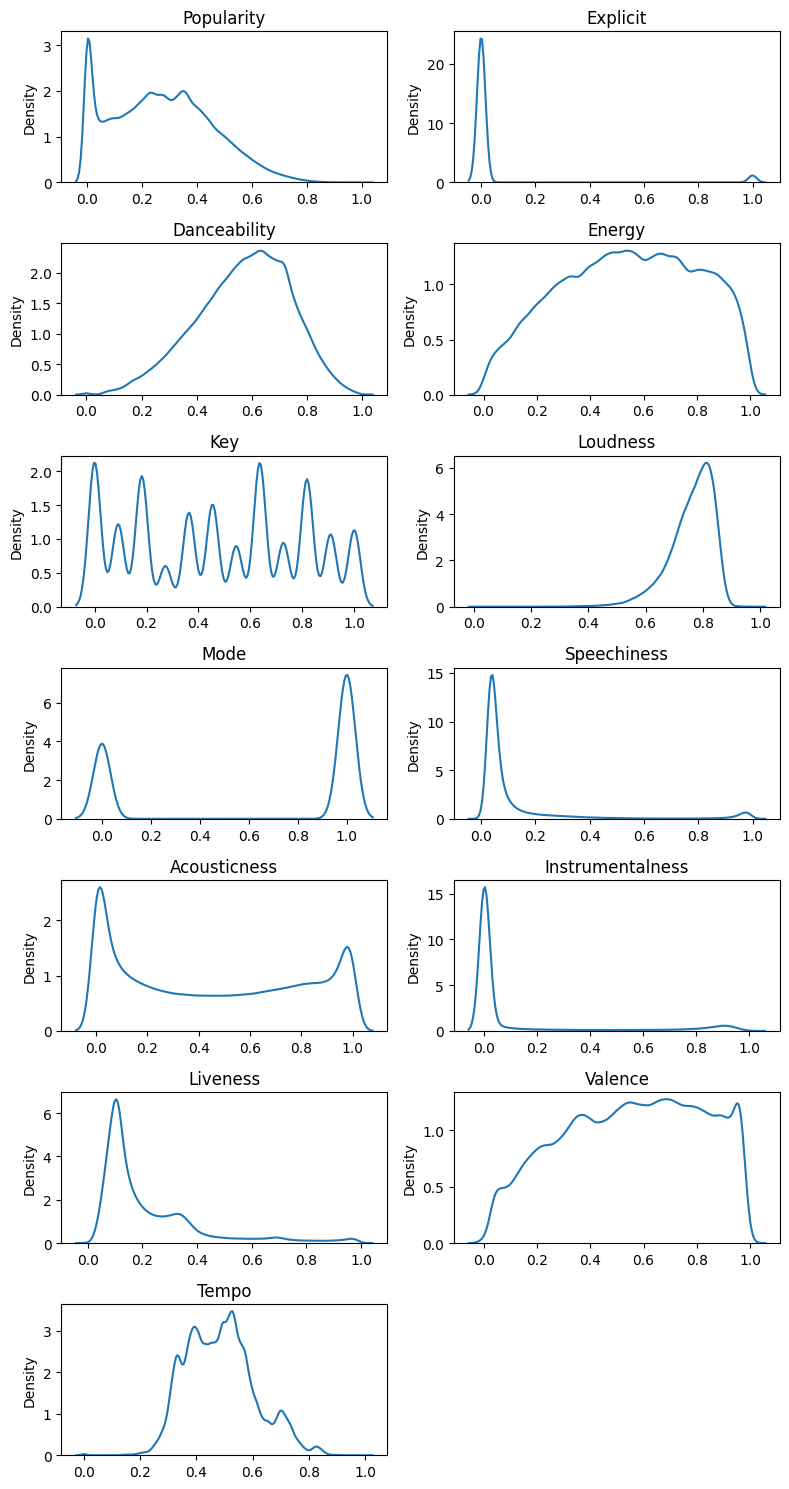

In [14]:
nums_col = ['Popularity','Explicit','Danceability', 'Energy', 'Key',
            'Loudness', 'Mode', 'Speechiness', 'Acousticness',
            'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
plt.subplots(figsize = (8, 15))
plt.axis('off')
for i, col in enumerate(nums_col):
    plt.subplot(7, 2, i + 1)
    sb.kdeplot(music_features_scaled[:,i])
    plt.title(nums_col[i])
    plt.tight_layout()
plt.show()

In [15]:
song_vectorizer = CountVectorizer()
song_vectorizer.fit(music_df['Artists'])

CountVectorizer()

In [17]:
# text_array1 = song_vectorizer.transform(music_df[music_df['Track Name']==input_song_name]['Artists']).toarray()
# text_array1.shape

In [18]:
text_array2 = song_vectorizer.transform(music_df['Artists'])
text_array2.shape

(446444, 73678)

In [19]:
text_array2

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1156922 stored elements and shape (446444, 73678)>

In [20]:
# a function to get content-based recommendations based on music features
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get the index of the input song in the music DataFrame
    input_song_index = music_df[music_df['Track Name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)


    text_array1 = song_vectorizer.transform(music_df[music_df['Track Name']==input_song_name]['Artists']).toarray()
    text_array2 = song_vectorizer.transform(music_df['Artists'])
    similarity_scores += 0.07*cosine_similarity(text_array1,text_array2)
    
    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = music_df.iloc[similar_song_indices][['Track Name', 'Artists', 'Release Date', 'Popularity']]

    return content_based_recommendations


In [21]:
content_based_recommendations('Rock Your Body')

,Track Name,Artists,Release Date,Popularity
86578,Mirrors - Radio Edit,['Justin Timberlake'],11-02-2013,65
79422,What Goes Around.../...Comes Around (Interlude),['Justin Timberlake'],12-09-2006,72
75592,Señorita,['Justin Timberlake'],04-11-2002,67
468637,Why We Drink,['Justin Moore'],26-07-2019,67
158765,Fabuloso,"['Sech', 'Justin Quiles']",21-05-2020,70
